<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/1479517/2444963/1aaa3760e7dd34a87af175482c1514ae/dataset-cover.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Car Price Dataset</strong></p>  
            
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Engineer Module-3:<br>Car price Dataset Classification and Regression<br><br></p>
    
  <div style="align: center;">
  <table style="text-align: center; background-color: romance; color: Jaguar; border-radius: 10px; font-family: monospace;
                  line-height:1.4; font-size: 21px; font-weight: normal; text-transform: capitalize; padding: 5px; 
                  margin: 0 auto;">
    <tr><td style="text-align: left; padding-left: 0px;"
            > Exploratory Data Analysis (EDA) <span style="font-size: 16px;">( Variance Inflation Factor (VIF) )</span></td></tr>
    <tr><td style="text-align: left; padding-left: 0px;"
            > Logistic Regression Model Training <span style="font-size: 16px;">( Recursive Feature Elimination (RFE) )</span></td></tr>
    <tr><td style="text-align: left; padding-left: 0px;"
            > Ridge Regression Model Training <span style="font-size: 16px;">( Optuna Hyperparameter Tuning )</span></td></tr>
  </table>
  </div>

</div>

**Dataset More Info**

> 

**About Dataset**

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

<!-- **Context** -->

<!-- **Content** -->


**TASK**

**Homework**

> Note: sometimes your answer doesn't match one of the options exactly. That's fine.

> Select the option that's closest to your solution.

**Dataset**

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

**Features**

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

**Data preparation**

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


**Submit the results**

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


**Deadline**

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.

Questions: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

```
pip freeze > requirements.txt
conda list -e > requirements.txt

# new conda virtual environment
conda create --name "lin-reg" python=3.10 jupyter -y
conda activate "lin-reg"

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge --file=requirements.txt      # mostly not work
conda install -c conda-forge pandas==2.0.2 -q -y

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

```

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes. In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```
- command1 & command2  # runs simultaneously
- command1 ; command2  # runs sequentially
- command1 && command2 # runs sequentially, runs command2 only if command1 succeeds
- command1 || command2 # runs sequentially, runs command2 only if command1 fails
```

In [1]:
!python -V

Python 3.10.12


In [2]:
%%writefile requirements.txt 
# To get started with MLflow you'll need to install the appropriate Python package.

# for parquet file
pyarrow
fastparquet
# orjson is a fast, correct JSON library
orjson
numpy
pandas
matplotlib
seaborn
scipy
tqdm
joblib

# ML Model packages
scikit-learn
xgboost
optuna
hyperopt

# MLOPS experiment-tracking Packages
mlflow
wandb

# MLOPS Orchestration Packages
boto3
prefect
prefect-aws
prefect-email

# MLOPS Monitoring Packages
evidently
psycopg
psycopg[binary]

# Optionally
requests
# for py file parameter
click
# for code style
black

# Optionally
jupyter
ipykernel
ipywidgets
pipenv

Writing requirements.txt


In [3]:
# !pip install pyarrow fastparquet orjson pandas matplotlib seaborn tqdm requests scikit-learn xgboost optuna hyperopt
# !pip install mlflow prefect prefect-email boto3 prefect-aws joblib evidently
# !pip install psycopg psycopg[binary] pipenv jupyter ipykernel ipywidgets

In [4]:
import os, sys, platform, IPython.display

# pip install --no-deps --no-index --force-reinstall --no-cache-dir --user
# !{sys.executable} -m pip install -Uq -r requirements.txt --no-cache-dir --user
# !jupyter nbextension enable --py widgetsnbextension

# IPython.display.clear_output()
print("Platform:", platform.system())  # platform.platform()
print("Python  :", platform.python_version())  # sys.version
print("Actv Env:", os.getenv('CONDA_DEFAULT_ENV', 'Not Found Conda Env'))

Platform: Windows
Python  : 3.10.12
Actv Env: lin-reg


In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
# import scipy
# import scipy.stats as stats
# from scipy.sparse import hstack
from scipy.stats import skew, norm, gamma, probplot

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression, TweedieRegressor, LogisticRegression
# from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Ridge, RidgeCV
# from sklearn.svm import LinearSVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mutual_info_score
# from sklearn.model_selection import GridSearchCV

# import xgboost as xgb
# Hyperparameter Optimization with Tree-structured Parzen Estimator (TPE) algorithm
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# from hyperopt.pyll import scope
import optuna

import os
import sys
import pickle
import zipfile
# import boto3
# import click
# import pathlib
# import argparse
# import requests
# import urllib.request
from glob import glob
# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
# tqdm._instances.clear()
# Import joblib for model persistence
# from joblib import load, dump

# memory management performs garbage collection 
import gc
gc.collect()

0

In [7]:
# Filter out FutureWarnings
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action="ignore", message="FutureWarning: is_categorical_dtype*")
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(is_categorical_dtype is deprecated)')
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(use_inf_as_na option is deprecated)')
warnings.filterwarnings(action="ignore", module="sklearn", category=FutureWarning, message='(is_sparse is deprecated)')
warnings.filterwarnings(action="ignore", module="xgboost", category=FutureWarning, message='(is_sparse is deprecated)')

In [8]:
# !pip install session_info
import session_info
session_info.show(html=False)

-----
hyperopt            0.2.7
matplotlib          3.8.1
numpy               1.25.2
optuna              3.3.0
pandas              2.1.0
scipy               1.11.3
seaborn             0.13.0
session_info        1.0.0
sklearn             1.2.2
statsmodels         0.14.0
tqdm                4.66.1
xgboost             2.0.1
-----
IPython             8.12.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-11-04 21:31


In [9]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
# os.makedirs('./data', exist_ok=True)
# os.makedirs('./pycode', exist_ok=True)
os.makedirs('./output', exist_ok=True)
os.makedirs('./model', exist_ok=True)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

### Getting the Dataset 

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

### Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [10]:
# Download the data
!curl -Os --create-dirs --output-dir "./data" https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [11]:
glob('data/*.*')

['data\\data.csv']

In [12]:
# Read the data
csv_filename = 'data.csv'
csv_filepath = f'data/{csv_filename}'

# Read the CSV file
df = pd.read_csv(csv_filepath, low_memory=False)

In [13]:
print("Shape of DataFrame:", df.shape)
df.head()

Shape of DataFrame: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Exploration

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [17]:
# Check for missing values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [18]:
df.describe(include='O').T

,count,unique,top,freq
Make,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,regular unleaded,7172
Transmission Type,11914,5,AUTOMATIC,8266
Driven_Wheels,11914,4,front wheel drive,4787
Market Category,8172,71,Crossover,1110
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Exloratory Data Analysis</strong></h1>   
</div>

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data preparation

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [20]:
features = "Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP".split(',')
df = df[features]
df.shape

(11914, 10)

In [21]:
# Rename 'MSRP' variable to 'price'
df = df.rename(columns={'MSRP': 'price'})
df.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'price']

In [22]:
# !pip install skimpy --user
from skimpy import clean_columns
df = clean_columns(df)
df.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

### Data Cleaning

In [23]:
# Fill missing values in numeric features with 0
df = df.fillna(0)

In [24]:
# Check for missing values
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [25]:
df.nunique()

make                   48
model                 915
year                   28
engine_hp             357
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [26]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [27]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [28]:
df.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 

In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [29]:
numers = df.select_dtypes('number').columns

# Finding the two features with the biggest correlation with each
max_corr = df[numers].corr()[df[numers].corr()!=1]
max_corr = max_corr.unstack().sort_values(key=abs, ascending=False)
max_corr = max_corr.drop_duplicates().round(2)
max_corr.head()

highway_mpg       city_mpg            0.89
engine_cylinders  engine_hp           0.77
engine_hp         price               0.65
engine_cylinders  highway_mpg        -0.61
city_mpg          engine_cylinders   -0.59
dtype: float64

In [30]:
# Finding features with the biggest correlation with 'city_mpg'
df[numers].drop(columns='city_mpg').corrwith(df['city_mpg']).sort_values(key=abs, ascending=False).round(2)

highway_mpg         0.89
engine_cylinders   -0.59
engine_hp          -0.42
year                0.20
price              -0.16
dtype: float64

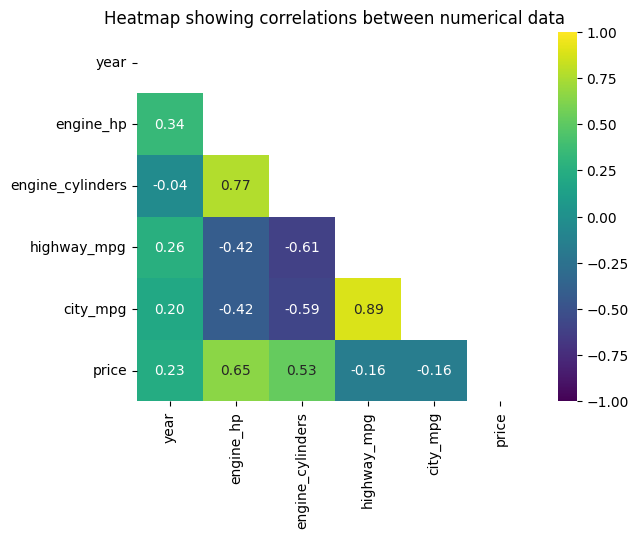

In [31]:
numers = df.select_dtypes('number').columns

# Feature Importance: Correlation
sns.heatmap(
    df[numers].corr().round(2), 
    mask=np.triu(np.ones_like(df[numers].corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap='viridis', fmt='.2f'
)
plt.title('Heatmap showing correlations between numerical data')
plt.show();

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [32]:
# Calculate the mean of the 'price' column
price_mean = df['price'].mean()
price_mean

40594.737032063116

In [33]:
# Create the 'above_average' column with 1 if price > mean, else 0
# df['above_average'] = np.where(df['price'] >= price_mean, 1, 0)
df['above_average'] = (df['price'] > price_mean).astype(int)
df.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [34]:
# Save the data to a CSV file
df.to_csv('output/df_cleaned.csv', index=False)
pd.read_csv('output/df_cleaned.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
 10  above_average      11914 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1024.0+ KB


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [35]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Step 1: Split the data
# Assuming 'df' is your DataFrame and 'above_average' is the target column
X = df.drop(columns=['above_average', 'price'])  # Features (exclude the target)
y = df['above_average'].values  # Target variable

# Split the data into train, validation, and test sets (60%/20%/20%)
full_train_df, test_df, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
train_df, val_df, y_train, y_val = train_test_split(full_train_df, y_full_train, test_size=0.25, random_state=SEED)

# Display the shapes of the resulting sets
print("Train set shape:", train_df.shape, y_train.shape)
print("Val set shape  :", val_df.shape, y_val.shape)
print("Test set shape :", test_df.shape, y_test.shape)

assert len(X) == (len(train_df) + len(val_df) + len(test_df))
assert 'price' not in train_df.columns
assert 'price' not in val_df.columns
assert 'price' not in test_df.columns

Train set shape: (7148, 9) (7148,)
Val set shape  : (2383, 9) (2383,)
Test set shape : (2383, 9) (2383,)


### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [36]:
# Feature Importance: Mutual Information
from sklearn.metrics import mutual_info_score

def mutual_information_score(predictor: pd.Series, y=y_train):
    return mutual_info_score(predictor, y).round(2)

# Select categorical columns
cat = df.select_dtypes('O').columns

# Calculate mutual information scores
train_df[cat].apply(mutual_information_score).to_frame(name='MI Scores').sort_values(by='MI Scores')

,MI Scores
transmission_type,0.02
vehicle_style,0.08
make,0.24
model,0.46


# Model Training

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

### OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


def model_builder():    
    # Select categorical columns
    cat = train_df.select_dtypes('O').columns

    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat),
        remainder = 'passthrough'
    )

    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=SEED))
    ])
    return model

# Create a model
model = model_builder()

# Fit the model on the training dataset
model.fit(train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [39]:
# Check model input features count
len(model[0].get_feature_names_out())

943

In [41]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the validation dataset
accuracy = accuracy_score(y_val, model.predict(val_df)).round(2)
accuracy

0.94

### DictVectorizer

In [42]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline

# Define a function to transform DataFrame to dictionary records
def to_dict_records(df: pd.DataFrame):
    return df.to_dict(orient='records')

def model_builder():
    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = Pipeline([
        ('to_dict', FunctionTransformer(func=to_dict_records)),
        ('dv', DictVectorizer(sparse=True)),
    ])
    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=SEED))
    ])
    return model

# Create a model
model2 = model_builder()

# Fit the model on the training dataset
model2.fit(train_df, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('to_dict',
                                  FunctionTransformer(func=<function model_builder.<locals>.<lambda> at 0x00000223B5C32B90>)),
                                 ('dv', DictVectorizer())])),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [43]:
# Calculate accuracy on the validation dataset
accuracy = accuracy_score(y_val, model2.predict(val_df)).round(2)
accuracy

0.95

### Question 5 

* Let's find the least useful feature using the *`feature elimination`* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. **Record the accuracy** for each model.
* For each feature, calculate the **difference between the original accuracy and the accuracy** without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [46]:
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store the differences
differences = {}
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
features = train_df.columns
original_accuracy = accuracy

# Loop through each feature and exclude it
for feature in features:
    # Drop one of feature
    subset = features.drop(feature)

    # Initialize a model
    model = model_builder()    
    # Train a model without the current feature
    model.fit(train_df[subset], y_train) 
    
    # Calculate accuracy
    accuracy_excluded = accuracy_score(y_val, model.predict(val_df[subset]))
    
    # Calculate the difference in accuracy, Store the difference in the dictionary
    scores.loc[len(scores)] = [feature, accuracy_excluded, (original_accuracy - accuracy_excluded)]

# Find the feature with the smallest difference
scores

,eliminated_feature,accuracy,difference
0,make,0.946706,0.003294
1,model,0.924045,0.025955
2,year,0.947965,0.002035
3,engine_hp,0.927822,0.022178
4,engine_cylinders,0.945867,0.004133
5,transmission_type,0.945027,0.004973
6,vehicle_style,0.932438,0.017562
7,highway_mpg,0.946706,0.003294
8,city_mpg,0.932438,0.017562


In [50]:
# scores[scores['difference'] == scores['difference'].min()]
scores.loc[scores[['difference']].idxmin()]

,eliminated_feature,accuracy,difference
2,year,0.947965,0.002035


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [51]:
# Apply logarithmic transformation to 'price'
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define a function to transform DataFrame to dictionary records
def to_dict_records(df: pd.DataFrame):
    return df.to_dict(orient='records')

def model_builder(params):
    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = Pipeline([
        ('to_dict', FunctionTransformer(func=to_dict_records)),
        ('dv', DictVectorizer(sparse=True)),
    ])
    # Create a Ridge regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(**params))
    ])
    return model

params = {
    # 'max_iter'    : 99999,
    'alpha'       : 1.0, 
    'solver'      :'sag', 
    'random_state': SEED, 
}
# Create a sample model
model_builder(params)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('to_dict',
                                  FunctionTransformer(func=<function model_builder.<locals>.<lambda> at 0x00000223B5C53B50>)),
                                 ('dv', DictVectorizer())])),
                ('regressor', Ridge(random_state=42, solver='sag'))])

In [70]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    params['alpha'] = alpha

    model = model_builder(params)
    model.fit(train_df, y_train)
        
    score = mean_squared_error(y_val, model.predict(val_df), squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

alpha = 0:	 RMSE = 0.21754841495337962
alpha = 0.01:	 RMSE = 0.21752993826416897
alpha = 0.1:	 RMSE = 0.2174429253446771
alpha = 1:	 RMSE = 0.2182324447418951
alpha = 10:	 RMSE = 0.23805326725540688
The smallest `alpha` is 0.1.


In [71]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    params['alpha'] = alpha

    model = model_builder(params)
    model.fit(train_df, y_train_log)
        
    score = mean_squared_error(y_val_log, model.predict(val_df), squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

alpha = 0:	 RMSE = 0.1507878556504792
alpha = 0.01:	 RMSE = 0.15079440619455975
alpha = 0.1:	 RMSE = 0.15072068568667923
alpha = 1:	 RMSE = 0.15126695959595232
alpha = 10:	 RMSE = 0.16500991050180855
The smallest `alpha` is 0.


In [78]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        # 'alpha': trial.suggest_float(name='alpha', low=1e-2, high=1e2, step=None, log=False),
        'alpha'       : trial.suggest_categorical(name='alpha', choices=[0, 0.01, 0.1, 1, 10]),
        'solver'      : 'sag',
        'random_state': SEED,
        'max_iter'    : 99999,
    }

    # Create and train RandomForestRegressor with suggested hyperparameters
    model = model_builder(params)
    model.fit(train_df, y_train_log)

    # Make predictions on validation data and calculate RMSE
    rmse = mean_squared_error(y_val_log, model.predict(val_df), squared=False)
    return rmse

In [79]:
# Set the number of trials for optimization
num_trials=10

def optimize_hyperparameters(num_trials):
    # Configure the sampler and create a study
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="minimize", sampler=sampler)

    # Optimize the study
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)    
    return study

study = optimize_hyperparameters(num_trials)

[I 2023-11-04 22:07:45,322] A new study created in memory with name: no-name-4a5a46ae-3dd9-4e37-a43e-92d33d8c7385


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-11-04 22:07:45,733] Trial 0 finished with value: 0.15079440619455975 and parameters: {'alpha': 0.01}. Best is trial 0 with value: 0.15079440619455975.
[I 2023-11-04 22:07:46,034] Trial 1 finished with value: 0.15072068568667923 and parameters: {'alpha': 0.1}. Best is trial 1 with value: 0.15072068568667923.
[I 2023-11-04 22:07:46,338] Trial 2 finished with value: 0.15079440619455975 and parameters: {'alpha': 0.01}. Best is trial 1 with value: 0.15072068568667923.
[I 2023-11-04 22:07:46,641] Trial 3 finished with value: 0.15072068568667923 and parameters: {'alpha': 0.1}. Best is trial 1 with value: 0.15072068568667923.
[I 2023-11-04 22:07:46,931] Trial 4 finished with value: 0.1507878556504792 and parameters: {'alpha': 0}. Best is trial 1 with value: 0.15072068568667923.
[I 2023-11-04 22:07:47,215] Trial 5 finished with value: 0.1507878556504792 and parameters: {'alpha': 0}. Best is trial 1 with value: 0.15072068568667923.
[I 2023-11-04 22:07:47,494] Trial 6 finished with value:

In [80]:
# Get the best trial and its parameters
best_trial = study.best_trial
best_params = best_trial.params
best_value = best_trial.value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Value: {best_value:.2f}")

Best Parameters: {'alpha': 0.1}
Best RMSE Value: 0.15


## End of Project